<a href="https://colab.research.google.com/github/raimamathew/Heart-Arrhythmia/blob/master/Review1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

%matplotlib inline

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
train_data = pd.read_csv('/content/drive/My Drive/Heart Arrhythmia/mitbih_train.csv',header=None)
test_data= pd.read_csv('/content/drive/My Drive/Heart Arrhythmia/mitbih_test.csv',header=None)

In [5]:
train_data.shape

(87554, 188)

In [6]:
test_data.shape

(21892, 188)

In [8]:

# check for the unique values of each column in train data
for item in train_data:
    print(item, train_data[item].nunique())
print(train_data.shape)
# Variation has mostly different values

0 23408
1 42845
2 49611
3 41007
4 39328
5 40559
6 40516
7 40423
8 40305
9 39950
10 40106
11 40347
12 40320
13 40628
14 41177
15 41671
16 42091
17 42404
18 42914
19 43188
20 43678
21 44172
22 44576
23 44779
24 45154
25 45500
26 45612
27 46051
28 46434
29 46729
30 46719
31 46839
32 46364
33 46230
34 46283
35 46241
36 46005
37 45864
38 45604
39 45630
40 45347
41 44982
42 44738
43 44358
44 44234
45 43859
46 43714
47 43539
48 43191
49 43062
50 43036
51 42994
52 42901
53 43068
54 43079
55 43168
56 43194
57 43126
58 43094
59 43344
60 43493
61 43551
62 43608
63 43540
64 43689
65 43826
66 43789
67 43571
68 43632
69 43398
70 43182
71 42983
72 42859
73 42587
74 42472
75 42266
76 42506
77 42441
78 42505
79 42155
80 41864
81 41514
82 41141
83 41031
84 40877
85 40759
86 40387
87 40090
88 39757
89 38969
90 38494
91 37927
92 37172
93 36701
94 36032
95 35862
96 35574
97 35019
98 34649
99 34352
100 33787
101 33370
102 32584
103 31973
104 31198
105 30619
106 29791
107 29163
108 28263
109 27653
110 26803


0.0    72471
4.0     6431
2.0     5788
1.0     2223
3.0      641
Name: 187, dtype: int64


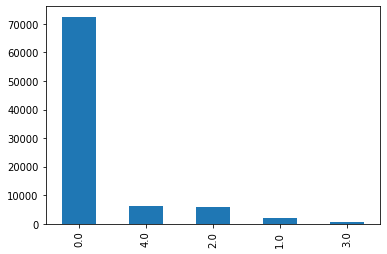

In [10]:
import matplotlib.pyplot as plt
import pandas as pd

CountStatus = pd.value_counts(train_data[187], sort=True)
print(CountStatus)

CountStatus.plot.bar()

In [11]:
# Check the test dataset
print(test_data.shape)
#21892 rows, 188 columns
print(test_data.info())
# no null values
print(test_data.head())

(21892, 188)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21892 entries, 0 to 21891
Columns: 188 entries, 0 to 187
dtypes: float64(188)
memory usage: 31.4 MB
None
        0         1         2         3         4    ...  183  184  185  186  187
0  1.000000  0.758264  0.111570  0.000000  0.080579  ...  0.0  0.0  0.0  0.0  0.0
1  0.908425  0.783883  0.531136  0.362637  0.366300  ...  0.0  0.0  0.0  0.0  0.0
2  0.730088  0.212389  0.000000  0.119469  0.101770  ...  0.0  0.0  0.0  0.0  0.0
3  1.000000  0.910417  0.681250  0.472917  0.229167  ...  0.0  0.0  0.0  0.0  0.0
4  0.570470  0.399329  0.238255  0.147651  0.000000  ...  0.0  0.0  0.0  0.0  0.0

[5 rows x 188 columns]


In [12]:
# check for the unique values of each column in test data
for item in test_data:
    print(item, test_data[item].nunique())
print(test_data.shape)
# last column is target column - 5 class

0 8507
1 16139
2 17462
3 15054
4 15217
5 15453
6 15565
7 15672
8 15641
9 15562
10 15615
11 15713
12 15740
13 15729
14 15872
15 16053
16 16004
17 16205
18 16240
19 16416
20 16452
21 16474
22 16626
23 16708
24 16706
25 16807
26 16836
27 16918
28 17146
29 17148
30 17116
31 17051
32 17042
33 16954
34 16988
35 16935
36 16900
37 16922
38 16841
39 16821
40 16794
41 16665
42 16616
43 16592
44 16550
45 16460
46 16390
47 16314
48 16306
49 16227
50 16288
51 16241
52 16316
53 16241
54 16286
55 16226
56 16244
57 16277
58 16151
59 16192
60 16315
61 16358
62 16299
63 16222
64 16322
65 16265
66 16178
67 16159
68 16134
69 16007
70 15975
71 15992
72 15800
73 15813
74 15722
75 15622
76 15577
77 15435
78 15320
79 15153
80 14914
81 14849
82 14669
83 14526
84 14373
85 14385
86 14235
87 14100
88 13890
89 13688
90 13508
91 13311
92 13111
93 12931
94 12624
95 12471
96 12303
97 12052
98 11785
99 11549
100 11390
101 11170
102 10902
103 10530
104 10322
105 9942
106 9664
107 9415
108 9136
109 8892
110 8666
111 847

0.0    18118
4.0     1608
2.0     1448
1.0      556
3.0      162
Name: 187, dtype: int64


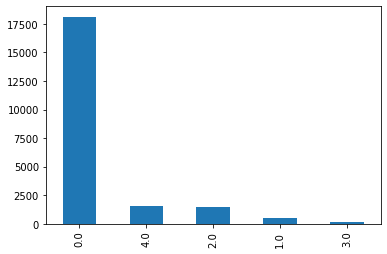

In [13]:
import matplotlib.pyplot as plt
import pandas as pd

CountStatus = pd.value_counts(test_data[187], sort=True)
print(CountStatus)

CountStatus.plot.bar()

In [0]:
X_train = pd.read_csv('/content/drive/My Drive/Heart Arrhythmia/mitbih_train.csv',header=None,usecols=range(187))
Y_train = pd.read_csv('/content/drive/My Drive/Heart Arrhythmia/mitbih_train.csv',header=None,usecols=[187]).iloc[:,0]

In [0]:
X_test = pd.read_csv('/content/drive/My Drive/Heart Arrhythmia/mitbih_test.csv',header=None,usecols=range(187))
Y_test = pd.read_csv('/content/drive/My Drive/Heart Arrhythmia/mitbih_test.csv',header=None,usecols=[187]).iloc[:,0]

In [0]:
import time
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report

In [23]:
model = LogisticRegression(multi_class="ovr",solver="newton-cg", class_weight="balanced",
                          n_jobs=2, max_iter=150, C=.5)

start_time = time.time()
model.fit(X_train,Y_train)
print("training time {}".format(time.time()-start_time))

training time 107.10169315338135


In [24]:
y_predict = model.predict(X_test)
cf = confusion_matrix(Y_test,y_predict)
print("accuracy: " + str(accuracy_score(Y_test,y_predict)))

accuracy: 0.7881874657409099


In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, log_loss

rfc1 = RandomForestClassifier()
rfc1.fit(X_train, Y_train)

y_pred = rfc1.predict(X_test)

yhat_pp = rfc1.predict_proba(X_test)
print('log loss:', log_loss(Y_test, yhat_pp))

print(classification_report(Y_test, y_pred,))

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


log loss: 0.27831012723719234
              precision    recall  f1-score   support

         0.0       0.97      1.00      0.98     18118
         1.0       0.96      0.59      0.73       556
         2.0       0.97      0.87      0.92      1448
         3.0       0.85      0.56      0.67       162
         4.0       0.99      0.94      0.96      1608

    accuracy                           0.97     21892
   macro avg       0.95      0.79      0.85     21892
weighted avg       0.97      0.97      0.97     21892



In [20]:
# XGBoost
import xgboost as xgb

model=xgb.XGBClassifier(random_state=1,learning_rate=0.1)
model.fit(X_train,Y_train)
model.score(X_test,Y_test)

y_pred = model.predict(X_test)

yhat_pp = model.predict_proba(X_test)
print('log loss:', log_loss(Y_test, yhat_pp))
print(classification_report(Y_test,y_pred))
# Slightly worse f1-score, but better log loss score than RFC

log loss: 0.15180948806784986
              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98     18118
         1.0       0.94      0.54      0.68       556
         2.0       0.95      0.79      0.86      1448
         3.0       0.74      0.40      0.52       162
         4.0       0.98      0.91      0.95      1608

    accuracy                           0.96     21892
   macro avg       0.91      0.73      0.80     21892
weighted avg       0.96      0.96      0.96     21892

